# jupyter notebook关于数学库的简单实用

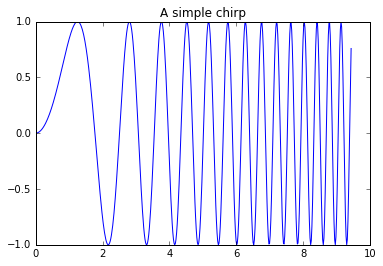

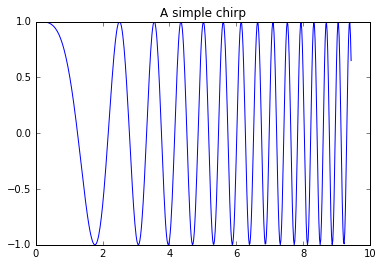

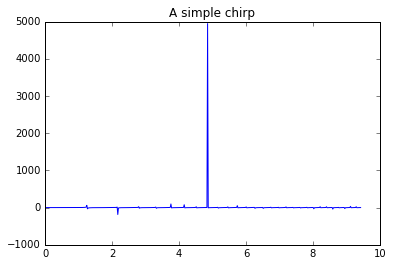

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

plt.plot(x, np.cos(x**2))
plt.title('A simple chirp')
plt.show()
plt.plot(x, np.tan(x**2))
plt.title('A simple chirp')
plt.show()

In [4]:
!ping 114.114.114.114


正在 Ping 114.114.114.114 具有 32 字节的数据:
来自 114.114.114.114 的回复: 字节=32 时间=15ms TTL=89
来自 114.114.114.114 的回复: 字节=32 时间=15ms TTL=68
来自 114.114.114.114 的回复: 字节=32 时间=15ms TTL=81
来自 114.114.114.114 的回复: 字节=32 时间=33ms TTL=84

114.114.114.114 的 Ping 统计信息:
    数据包: 已发送 = 4，已接收 = 4，丢失 = 0 (0% 丢失)，
往返行程的估计时间(以毫秒为单位):
    最短 = 15ms，最长 = 33ms，平均 = 19ms


In [5]:
!ipconfig


Windows IP 配置


以太网适配器 本地连接:

   媒体状态  . . . . . . . . . . . . : 媒体已断开
   连接特定的 DNS 后缀 . . . . . . . : 

无线局域网适配器 本地连接* 2:

   媒体状态  . . . . . . . . . . . . : 媒体已断开
   连接特定的 DNS 后缀 . . . . . . . : 

以太网适配器 Bluetooth 网络连接:

   媒体状态  . . . . . . . . . . . . : 媒体已断开
   连接特定的 DNS 后缀 . . . . . . . : 

以太网适配器 以太网:

   连接特定的 DNS 后缀 . . . . . . . : 
   本地链接 IPv6 地址. . . . . . . . : fe80::ade7:4210:d14a:44a6%4
   IPv4 地址 . . . . . . . . . . . . : 192.168.0.1
   子网掩码  . . . . . . . . . . . . : 255.255.255.0
   默认网关. . . . . . . . . . . . . : 

无线局域网适配器 WLAN:

   连接特定的 DNS 后缀 . . . . . . . : 
   本地链接 IPv6 地址. . . . . . . . : fe80::fd9b:daaf:802e:5b64%3
   IPv4 地址 . . . . . . . . . . . . : 192.168.101.59
   子网掩码  . . . . . . . . . . . . : 255.255.255.0
   默认网关. . . . . . . . . . . . . : 192.168.101.254

以太网适配器 VMware Network Adapter VMnet1:

   连接特定的 DNS 后缀 . . . . . . . : 
   本地链接 IPv6 地址. . . . . . . . : fe80::b561:8dd9:84a0:b0cd%10
   IPv4 地址 . . . . . . . . . . . . : 192.168.232.1
   子网掩码  . 

In [6]:
!ifconfig

'ifconfig' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


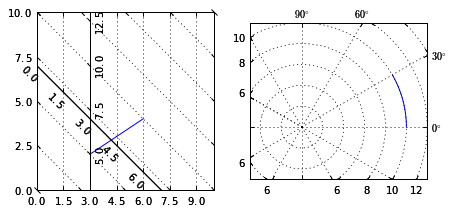

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, \
    ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import \
    GridHelperCurveLinear


def curvelinear_test1(fig):
    """
    grid for custom transform.
    """

    def tr(x, y):
        x, y = np.asarray(x), np.asarray(y)
        return x, y - x

    def inv_tr(x, y):
        x, y = np.asarray(x), np.asarray(y)
        return x, y + x

    grid_helper = GridHelperCurveLinear((tr, inv_tr))

    ax1 = Subplot(fig, 1, 2, 1, grid_helper=grid_helper)
    # ax1 will have a ticks and gridlines defined by the given
    # transform (+ transData of the Axes). Note that the transform of
    # the Axes itself (i.e., transData) is not affected by the given
    # transform.

    fig.add_subplot(ax1)

    xx, yy = tr([3, 6], [5.0, 10.])
    ax1.plot(xx, yy)

    ax1.set_aspect(1.)
    ax1.set_xlim(0, 10.)
    ax1.set_ylim(0, 10.)

    ax1.axis["t"] = ax1.new_floating_axis(0, 3.)
    ax1.axis["t2"] = ax1.new_floating_axis(1, 7.)
    ax1.grid(True)


import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D


def curvelinear_test2(fig):
    """
    polar projection, but in a rectangular box.
    """

    # PolarAxes.PolarTransform takes radian. However, we want our coordinate
    # system in degree
    tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

    # polar projection, which involves cycle, and also has limits in
    # its coordinates, needs a special method to find the extremes
    # (min, max of the coordinate within the view).

    # 20, 20 : number of sampling points along x, y direction
    extreme_finder = angle_helper.ExtremeFinderCycle(20, 20,
                                                     lon_cycle=360,
                                                     lat_cycle=None,
                                                     lon_minmax=None,
                                                     lat_minmax=(0, np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)
    # Find a grid values appropriate for the coordinate (degree,
    # minute, second).

    tick_formatter1 = angle_helper.FormatterDMS()
    # And also uses an appropriate formatter.  Note that,the
    # acceptable Locator and Formatter class is a bit different than
    # that of mpl's, and you cannot directly use mpl's Locator and
    # Formatter here (but may be possible in the future).

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = SubplotHost(fig, 1, 2, 2, grid_helper=grid_helper)

    # make ticklabels of right and top axis visible.
    ax1.axis["right"].major_ticklabels.set_visible(True)
    ax1.axis["top"].major_ticklabels.set_visible(True)

    # let right axis shows ticklabels for 1st coordinate (angle)
    ax1.axis["right"].get_helper().nth_coord_ticks = 0
    # let bottom axis shows ticklabels for 2nd coordinate (radius)
    ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

    fig.add_subplot(ax1)

    # A parasite axes with given transform
    ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
    # note that ax2.transData == tr + ax1.transData
    # Anthing you draw in ax2 will match the ticks and grids of ax1.
    ax1.parasites.append(ax2)
    intp = cbook.simple_linear_interpolation
    ax2.plot(intp(np.array([0, 30]), 50),
             intp(np.array([10., 10.]), 50))

    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    ax1.grid(True)

if 1:
    fig = plt.figure(1, figsize=(7, 4))
    fig.clf()

    curvelinear_test1(fig)
    curvelinear_test2(fig)

    plt.draw()
    plt.show()

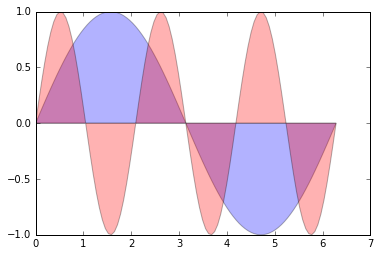

In [9]:
"""
Demo of the fill function with a few features.

In addition to the basic fill plot, this demo shows a few optional features:

    * Multiple curves with a single command.
    * Setting the fill color.
    * Setting the opacity (alpha value).
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(3 * x)
plt.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)
plt.show()

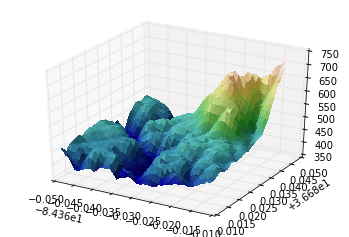

In [6]:
"""
Demonstrates using custom hillshading in a 3D surface plot.
"""
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

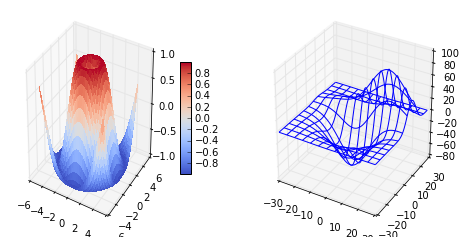

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt


# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.5))

#---- First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=10)

#---- Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [9]:
import urlparse,urllib,re,os
starturl="http://www.baidu.com"
html= urllib.urlopen(starturl).read().split('\n')
for eachline in html:
     currentFind = re.search(r'href="(.*?)"',eachline,re.IGNORECASE|re.DOTALL)
     if currentFind:
        print urlparse.urljoin(starturl,currentFind.group(1))

http://www.baidu.com/favicon.ico
http://www.baidu.com/content-search.xml
http://www.baidu.com/img/baidu.svg
http://s1.bdstatic.com
http://t1.baidu.com
http://t2.baidu.com
http://t3.baidu.com
http://t10.baidu.com
http://t11.baidu.com
http://t12.baidu.com
http://b1.bdstatic.com
http://www.baidu.com/
http://news.baidu.com/ns?cl=2&rn=20&tn=news&word=
http://www.baidu.com/cache/sethelp/help.html
